# **Trabalhando com multiplanilhas**

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_excel("/content/drive/MyDrive/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/datasets/Salvador.xlsx")

In [ ]:
#Concatenar as tabelas
lista = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
#Analisando quantas linhas e colunas eu tenho
lista.shape

(894, 5)

In [ ]:
#Lendo a lista
lista.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#Exibindo as ultimas 5 linhas
lista.tail(5)

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
#Verificando os dados de cada coluna com o metodo dtypes
lista.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

# Conversão dos dados

In [ ]:
#Mudando a tipagem dos dados
lista["LojaID"] = lista["LojaID"].astype(str)
lista.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

# Tratando Valores núlos

In [ ]:
#Selecionando valores nulos
lista.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Subtituindo valores nulos por zero
lista['LojaID'].fillna(0,inplace=True)

In [ ]:
#Apagando linhas de valores nulos
lista.dropna(subset=["Vendas"],inplace=True)

In [ ]:
#Removendo linhas que estão com valores faltantes em todas as colunas
lista.dropna(how="all",inplace=True)

# Criando Colunas 

In [ ]:
#Criando coluna de receitas
lista["Receitas"] = lista["Vendas"].mul(lista["Qtde"])

In [ ]:
#Exibindo a nova coluna 
lista.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#Retorna a maior quantidade de receita
lista['Receitas'].max()

3544.0

In [ ]:
#Retorna o valor minimo de receita
lista['Receitas'].min()

3.34

# Montando Ranking

In [ ]:
#nlargest localizando o top 3 das lojas que tiveram mais receita
lista.nlargest(3,'Receitas')

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
#nsmallest localizando o top 3 das lojas que tiveram menas receita
lista.nsmallest(3,'Receitas')

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
#Agrupamento do total de receitas por cada cidade
lista.groupby("Cidade")["Receitas"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receitas, dtype: float64

In [ ]:
#Retornando o top 3 de cidades que mais faturaram
lista.nlargest(3,"Receitas")

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
#Retornando as cidades que menos faturou
lista.nsmallest(3,"Receitas")

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:

#Ordenando o conjunto de dados na ordem do maior para o menor
lista.sort_values("Receitas",ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


# Transformação de dados

In [ ]:
#Trabalhando com datas e transformando em string

lista['Data'] = lista["Data"].astype(str)


In [ ]:
#Tipos de dados

lista.dtypes

Cidade       object
Data         object
Vendas      float64
LojaID       object
Qtde          int64
Receitas    float64
dtype: object

In [ ]:
#transformando em formato de data
lista['Data'] = pd.to_datetime(lista['Data'])

In [ ]:
lista['Data']

0     2018-01-01
1     2018-01-01
2     2018-01-01
3     2018-01-01
4     2018-01-01
         ...    
235   2019-01-03
236   2019-01-03
237   2019-01-03
238   2019-01-03
239   2019-01-03
Name: Data, Length: 894, dtype: datetime64[ns]

In [ ]:

#Agrupando o total da receita por ano
lista.groupby(lista["Data"].dt.year)["Receitas"].sum()


Data
2018    118176.53
2019    228246.45
Name: Receitas, dtype: float64

In [ ]:
#Amostra simples :
lista.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
69,Recife,2019-01-01,38.83,981,1,38.83
108,Salvador,2019-03-02,11.72,1037,1,11.72
192,Salvador,2019-01-02,166.51,1036,1,166.51
128,Aracaju,2018-01-01,37.49,1521,2,74.98
45,Recife,2019-01-01,15.90,983,8,127.20
63,Salvador,2019-01-01,166.59,1036,1,166.59
49,Aracaju,2018-01-01,53.74,1522,3,161.22
29,Fortaleza,2019-01-01,186.29,1005,2,372.58
124,Recife,2019-03-02,47.98,983,7,335.86
116,Salvador,2019-03-02,41.78,1034,3,125.34


In [ ]:

#Criando uma nova coluna com ano
lista['Ano'] = lista['Data'].dt.year


In [ ]:
#Extraindo dia e mês 
lista['Dia'] , lista['Mes'] = lista['Data'].dt.day , lista['Data'].dt.month

In [224]:
#Retornando a data mais antiga
lista["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [225]:
#Retornando a diferença de dias
lista['Diferença_Dias'] = lista['Data'] - lista['Data'].min()

In [227]:
lista.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano,Dia,Mes,Diferença_Dias
97,Fortaleza,2019-01-01,139.70,1003,4,558.80,2019,1,1,365 days
19,Recife,2019-01-01,199.43,983,7,1396.01,2019,1,1,365 days
11,Salvador,2019-01-01,30.62,1034,3,91.86,2019,1,1,365 days
27,Aracaju,2018-01-01,3.39,1523,4,13.56,2018,1,1,0 days
214,Salvador,2019-01-02,54.94,1036,2,109.88,2019,2,1,366 days


In [228]:
#Criando coluna de trimestre
lista['Trimestre'] = lista['Data'].dt.quarter

In [234]:
lista.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano,Dia,Mes,Diferença_Dias,Trimestre
27,Recife,2019-01-01,22.25,980,7,155.75,2019,1,1,365 days,1
206,Natal,2019-01-02,151.45,1036,2,302.90,2019,2,1,366 days,1
52,Salvador,2019-01-01,43.77,1036,2,87.54,2019,1,1,365 days,1
200,Natal,2019-01-02,41.06,1035,1,41.06,2019,2,1,366 days,1
52,Recife,2019-01-01,11.87,981,6,71.22,2019,1,1,365 days,1


In [243]:
#Filtrando as vendas do mês de março de 2019
filtro_vendas_março =  lista.loc[(lista['Data'].dt.year == 2019) & (lista['Data'].dt.month == 3)]

In [246]:
filtro_vendas_março

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano,Dia,Mes,Diferença_Dias,Trimestre
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,2,3,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,2,3,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,2,3,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,2,3,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,2,3,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,2,3,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,2,3,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,2,3,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,2,3,425 days,1


# Visualização De Dados


In [258]:
#Retorna quantas vezes essa loja vendeu na ordem de maior para menor
lista['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

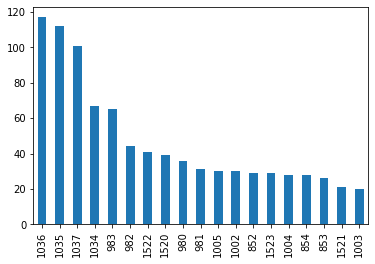

In [263]:
#Criar gráfico de barras
lista['LojaID'].value_counts(ascending=False).plot.bar();

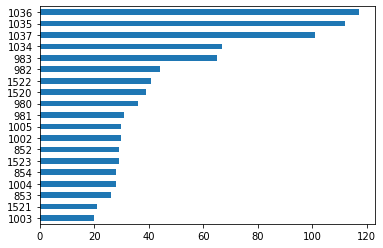

In [262]:
#Criando gráficos horizontal
lista['LojaID'].value_counts(ascending=True).plot.barh();

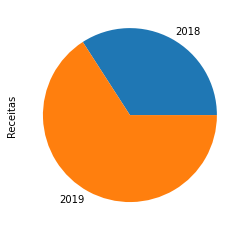

In [266]:
#Criando gráfico de Pizza mostrando o total da receita por ano
lista.groupby(lista['Ano'])['Receitas'].sum().plot.pie();

In [275]:
#Total De Vendas por cidade
lista['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

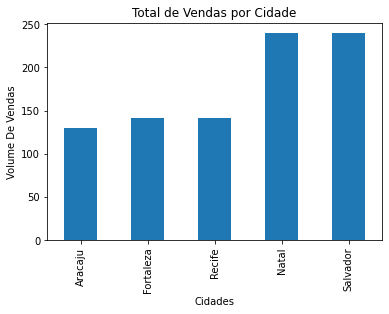

In [284]:
#Personalizando o gráfico e colocando titulo nos eixos
import matplotlib.pyplot as plt
lista['Cidade'].value_counts(ascending=True).plot.bar(title="Total de Vendas por Cidade");
plt.xlabel("Cidades");
plt.ylabel("Volume De Vendas");


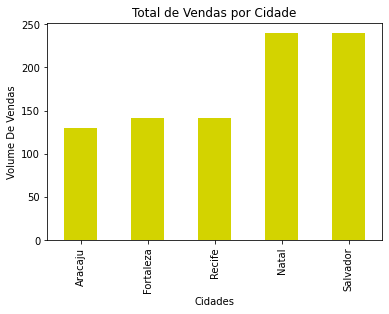

In [289]:
#Alterando cor do gráfico
lista['Cidade'].value_counts(ascending=True).plot.bar(title="Total de Vendas por Cidade",color="#d3d300");
plt.xlabel("Cidades");
plt.ylabel("Volume De Vendas");

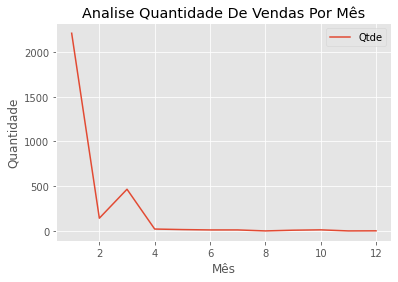

In [323]:
#alterando o estilo do grafico
lista.groupby(lista['Mes'])['Qtde'].sum().plot(title="Analise Quantidade De Vendas Por Mês");

plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.style.use("ggplot")
plt.legend();

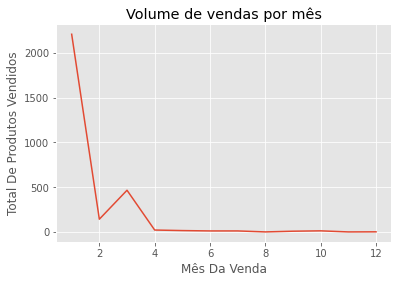

In [348]:
#Quantidade de vendas de produtos
lista.groupby(lista['Mes'])['Qtde'].sum().plot(title="Volume de vendas por mês");
plt.xlabel("Mês Da Venda");
plt.ylabel("Total De Produtos Vendidos");

In [480]:
#Selecionar apenas vendas de 2019
Vendas_2019 = lista[lista['Ano'] == 2019]

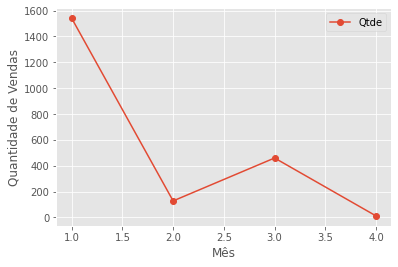

In [492]:
#Total de produtos vendidos por mês
Vendas_2019.groupby(Vendas_2019['Mes'])['Qtde'].sum().plot(marker= "o");
plt.xlabel("Mês");
plt.ylabel("Quantidade de Vendas");
plt.legend();


(array([564.,   0.,   0., ...,   0.,   0.,   5.]),
 array([1.        , 1.00140121, 1.00280243, ..., 3.99719757, 3.99859879,
        4.        ]),
 <a list of 2141 Patch objects>)

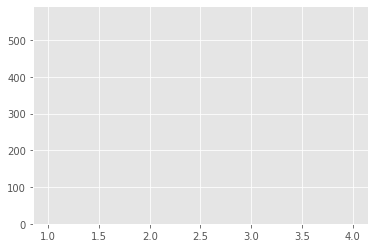

In [494]:
#Histograma
plt.hist(Vendas_2019['Mes'],Vendas_2019['Qtde'].sum())